# Trabajo Práctico: Procesamiento de datos

### Estudiante: Jessica Bilbao Restrepo

En la carpeta `data` se encuentra los datos crudos de ventas durante el 2022 de las diferentes sedes de una cadeda de tiendas DuttyFree ubicadas en distintos aeropuertos del país. Esta información se encuentra en distintos archivos en formato `.parquet` los cuales deben ser reconstruidos. La compañía desea analizar los datos para apoyar su proceso de toma de decisiones. Sin embargo, estos datos son recolectados manualmente desde cada una de las sedes por lo que se requiere previamente realizar una limpieza y procesamiento de los datos.

## Carga de configuraciones:

In [1]:
import pandas as pd
import matplotlib.pylab as plt
import os
#pd.set_option('max_columns', 50)
pd.options.display.float_format = '{:.2f}'.format

## Reconstrucción de los datos

Para manejar datos de archivos `.parquet` se requiere tener instalado uno de los siguientes paquetes: `pyarrow` o `fastparquet`. Para instalarlos, ejecute alguno de los siguientes comandos:

```
!pip install pyarrow
!pip install fastparquet
```

Lea y reconstruya los datos unificandolos en un mismo DataFrame. Luego, conteste las siguientes preguntas:

1. ¿Cuántos registros tienen los datos?
R/ Hay en total 781.632  registros
2. ¿Cuántas columnas tienen los datos?
R/ Hay en total 29 columnas
3. De una breve explicación de los datos que contiene cada columna.
R/ 
- **id_tienda** 
Número entero que identifica la tienda
- **nombre_tienda**
Nombre de la tienda
- **sigla** 
Código para identificar el aeropuerto
- **aeropuerto**
Nombre del aeropuerto
- **latitud y longitud**
Puntos de referencia identifcar la ubicaión del aeropuerto donde está la tienda
- **ciudad**
Nombre de la ciudad donde está el aeropuerto
- **region** 
Nombre de la región donde está el aeropuerto
- **id_compra**
Identificador único de la compra que se registra
- **moneda**
Indicativo de la moneda con que se paga
- **monto**
Cantidad a pagar por la compra
- **tipo_viaje**
Indica si el viaje que realiza el cliente es nacional o internacional
- **tipo_transito**
Indica si para el cliente viene de llegada o de salida del país
- **nacionalidad** 
Indica de donde es el cliente (Colombiano/a o extrajero/a)
- **fecha**
Fecha en que se realiza la compra
- **hora**
Hora del día en que se realiza la compra
- **minuto**
Minuto de la hora en la que se realiza la compra
- **medio_pago**
Indica la forma en la que se paga la compra (Efectivo o tarjeta de crédito)
- **franquicia_tdc**
Si se paga con tarjeta, se indica el tipo de tarjeta que se usa
- **procentaje_iva**
Porcentaje de IVA que se saca de la compra
- **monto_iva**
Cantidad de IVA que se paga por la venta
- **lleva_bolsa_plastica**
Indica si el cliente lleva bolsa (1 o O)
- **lleva_alcohol**
Indica si el cliente lleva alcohol (1 o O)
- **lleva_tabaco**
Indica si el cliente lleva tabaco (1 o O)
- **lleva_libros**
Indica si el cliente lleva libros (1 o O)
- **monto_pagado**
Monto total pagado y moneda con la que se paga
- **monto_pagado_cop**
Monto pagado en pesos colombianos
- **monto_pagado_usd**
Monto pagado en dólares
- **monto_pagado_eur**
Monto pagado en euros

4. ¿Existe alguna columna que contenga un 'identificador único'? ¿Existen registros duplicados en este campo?
R/ id_compra es ser un valor unico para cada registro o compra que se realiza y no hay elemetos duplicados
5. Haga un recuento de valores para cada columna categórica. ¿Existen valores con un mismo significado?
R/
###### En la columna 'moneda' hay valores que tiene mismo significado
- EUR / euros
- COP / pesos colombianos
- USD / dolares americanos

###### En la columna 'tipo_transito' hay valores que tiene mismo significado
- Arrival / Llegada
- Departure / Salida

###### En la columna 'medio_pago' hay valores que tiene mismo significado
- Efectivo / Cash
- Tarjeta / TDC

###### En la columna 'franquicia_tdc' hay valores que tiene mismo significado
- Mastercard / MCD
- American Express / AMEX


In [2]:
lista_archivos = os.listdir('data/')
lista_archivos

['Ventas_DuttyFree_0.parquet',
 'Ventas_DuttyFree_100000.parquet',
 'Ventas_DuttyFree_200000.parquet',
 'Ventas_DuttyFree_300000.parquet',
 'Ventas_DuttyFree_400000.parquet',
 'Ventas_DuttyFree_500000.parquet',
 'Ventas_DuttyFree_600000.parquet',
 'Ventas_DuttyFree_700000.parquet']

### Tabla con los datos completos

In [3]:
df = pd.DataFrame()
for i in range(0, 8):
    data = pd.read_parquet('data/'+lista_archivos[i] , engine='pyarrow')
    df = pd.concat([df, data], ignore_index = True)
df

,id_tienda,nombre_tienda,sigla,aeropuerto,latitud,longitud,ciudad,region,id_compra,moneda,...,porcentaje_iva,monto_iva,lleva_bolsa_plastica,lleva_alcohol,lleva_tabaco,lleva_libros,monto_pagado,monto_pagado_cop,monto_pagado_usd,monto_pagado_eur
0,900,DutyFree Costero,BAQ,Ernesto Cortissoz,10.89,-74.78,Barranquilla,Costa,5233170,EUR,...,0.19,5.37,1.00,1.00,NaN,NaN,EUR 28.26,NaN,NaN,28.26
1,500,DutyFree Galeras,PSO,Antonio Narino,1.40,-77.29,Pasto,Sur,643524,pesos colombianos,...,NaN,NaN,NaN,NaN,NaN,NaN,pesos colombianos 321300.0,NaN,NaN,NaN
2,600,DutyFree Capital,BOG,El Dorado,4.70,-74.15,Bogota,Centro,8990758,pesos colombianos,...,0.19,9158.00,1.00,0.00,NaN,1.00,pesos colombianos 48200.0,NaN,NaN,NaN
3,300,DutyFree Paisa,PEI,Matecaña,4.82,-75.74,Pereira,Eje Cafetero,637092,dolares americanos,...,0.19,19.29,1.00,1.00,NaN,0.00,dolares americanos 101.52,NaN,NaN,NaN
4,900,DutyFree Costero,BAQ,Ernesto Cortissoz,10.89,-74.78,Barranquilla,Costa,6853184,euros,...,0.19,51.83,0.00,NaN,1.00,NaN,euros 272.79,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
781627,100,DutyFree Paisa,MDE,Jose Maria Cordoba,6.17,-75.43,Rionegro,Eje Cafetero,9683054,euros,...,NaN,NaN,1.00,NaN,1.00,1.00,euros 115.17,NaN,NaN,NaN
781628,800,DutyFree Costero,CTG,Rafael Nunez,10.45,-75.52,Cartagena,Costa,5190273,dolares americanos,...,NaN,NaN,1.00,0.00,0.00,NaN,dolares americanos 264.71,NaN,NaN,NaN
781629,1000,DutyFree Costero,SMR,Simon Bolivar,11.12,-74.23,Santa Marta,Costa,3860589,euros,...,0.19,38.90,1.00,1.00,1.00,1.00,euros 204.75,NaN,NaN,NaN
781630,600,DutyFree Capital,BOG,El Dorado,4.70,-74.15,Bogota,Centro,8950782,dolares americanos,...,0.19,24.76,NaN,0.00,1.00,NaN,dolares americanos 130.29,NaN,NaN,NaN


In [4]:
df.columns

Index(['id_tienda', 'nombre_tienda', 'sigla', 'aeropuerto', 'latitud',
       'longitud', 'ciudad', 'region', 'id_compra', 'moneda', 'monto',
       'tipo_viaje', 'tipo_transito', 'nacionalidad', 'fecha', 'hora',
       'minuto', 'medio_pago', 'franquicia_tdc', 'porcentaje_iva', 'monto_iva',
       'lleva_bolsa_plastica', 'lleva_alcohol', 'lleva_tabaco', 'lleva_libros',
       'monto_pagado', 'monto_pagado_cop', 'monto_pagado_usd',
       'monto_pagado_eur'],
      dtype='object')

## Manipulación de datos

Luego de reconstruir y analizar los datos, se identificaron opciones de mejorar la calidad de los datos. Realice:

1. Elimine columnas que contengan datos duplicados.
- Se elimina la columna 'monto_pagado' ya que es un dato redundante, es el conjunto de dos columnas existentes. Además, se elimina también 'monto_pagado_usd' y 'monto_pagado_eur', ya que repiten los mismos datos de la columna 'monto' y no se ven necesarios
2. Para las columnas categóricas, unifique los valores con significados duplicados.
###### Para la columna 'moneda' se dejan los valores:
- EUR
- COP
- USD

###### Para la columna 'tipo_transito' se dejan los valores:
- Llegada
- Salida

###### Para la columna 'medio_pago' se dejan los valores:
- Efectivo
- TDC

###### Paa la columna 'franquicia_tdc' se dejan los valores:
- MCD
- AMEX

In [5]:
#Eliminando la columna monto_pagado
df = df.drop(['monto_pagado', 'monto_pagado_usd', 'monto_pagado_eur'], axis=1)

def unificar_valores(columna, valor_eliminar, valor_nuevo):
    df.loc[df[columna] == valor_eliminar, columna] = valor_nuevo

# Unificando valores en la columna moneda
unificar_valores('moneda', 'euros', 'EUR')

unificar_valores('moneda', 'pesos colombianos', 'COP')

unificar_valores('moneda', 'dolares americanos', 'USD')

# Unificando valores en la columna tipo_transito
unificar_valores('tipo_transito', 'Arrival', 'Llegada')

unificar_valores('tipo_transito', 'Departure', 'Salida')

# Unificando valores en la columna medio_pago
unificar_valores('medio_pago', 'Cash', 'Efectivo')

unificar_valores('medio_pago', 'Tarjeta', 'TDC')

# Unificando valores en la columna franquicia_tdc
unificar_valores('franquicia_tdc', 'American Express', 'AMEX')

unificar_valores('franquicia_tdc', 'Mastercard', 'MCD')

df

,id_tienda,nombre_tienda,sigla,aeropuerto,latitud,longitud,ciudad,region,id_compra,moneda,...,minuto,medio_pago,franquicia_tdc,porcentaje_iva,monto_iva,lleva_bolsa_plastica,lleva_alcohol,lleva_tabaco,lleva_libros,monto_pagado_cop
0,900,DutyFree Costero,BAQ,Ernesto Cortissoz,10.89,-74.78,Barranquilla,Costa,5233170,EUR,...,5,TDC,MCD,0.19,5.37,1.00,1.00,NaN,NaN,NaN
1,500,DutyFree Galeras,PSO,Antonio Narino,1.40,-77.29,Pasto,Sur,643524,COP,...,9,Efectivo,None,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,600,DutyFree Capital,BOG,El Dorado,4.70,-74.15,Bogota,Centro,8990758,COP,...,57,TDC,MCD,0.19,9158.00,1.00,0.00,NaN,1.00,NaN
3,300,DutyFree Paisa,PEI,Matecaña,4.82,-75.74,Pereira,Eje Cafetero,637092,USD,...,6,TDC,VISA,0.19,19.29,1.00,1.00,NaN,0.00,NaN
4,900,DutyFree Costero,BAQ,Ernesto Cortissoz,10.89,-74.78,Barranquilla,Costa,6853184,EUR,...,7,TDC,AMEX,0.19,51.83,0.00,NaN,1.00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
781627,100,DutyFree Paisa,MDE,Jose Maria Cordoba,6.17,-75.43,Rionegro,Eje Cafetero,9683054,EUR,...,32,Efectivo,None,NaN,NaN,1.00,NaN,1.00,1.00,NaN
781628,800,DutyFree Costero,CTG,Rafael Nunez,10.45,-75.52,Cartagena,Costa,5190273,USD,...,47,TDC,MCD,NaN,NaN,1.00,0.00,0.00,NaN,NaN
781629,1000,DutyFree Costero,SMR,Simon Bolivar,11.12,-74.23,Santa Marta,Costa,3860589,EUR,...,13,Efectivo,None,0.19,38.90,1.00,1.00,1.00,1.00,NaN
781630,600,DutyFree Capital,BOG,El Dorado,4.70,-74.15,Bogota,Centro,8950782,USD,...,3,TDC,AMEX,0.19,24.76,NaN,0.00,1.00,NaN,NaN


## Agrupación de datos

Luego de haber hecho una limpieza de datos, conteste las siguientes preguntas:

1. ¿Cuánto fue el total de ventas de cada tienda?
##### A continuación, se muestra la cantidad de ventas realizadas en cada tienda y el monto total recibido por divisa

In [7]:
#Total de ventas en cada tienda
total_ventas = df[['nombre_tienda', 'id_tienda', 'id_compra', 'moneda', 'monto']].groupby(['nombre_tienda', 'id_tienda', 'moneda']).agg(
    total_ventas=pd.NamedAgg(column="id_compra", aggfunc="count"),
    total_pagado=pd.NamedAgg(column="monto", aggfunc="sum")
)
total_ventas

total_ventas  total_pagado
nombre_tienda       id_tienda moneda                            
DutyFree Capital    600       COP            26221 6713255500.00
                              EUR            26096    4056884.79
                              USD            26019    4028310.73
DutyFree Costero    800       COP            25778 6581329000.00
                              EUR            25929    4010840.09
                              USD            26267    4062870.35
                    900       COP            26364 6687133000.00
                              EUR            26186    4028392.84
                              USD            26239    4082580.38
                    1000      COP            26156 6657230600.00
                              EUR            26082    4059786.10
                              USD            26269    4081036.82
DutyFree Galeras    500       COP            26138 6653404100.00
                              EUR            25958    4029220.63
                              USD            26092    4047997.93
DutyFree Manizalita 200       COP            26132 6664728900.00
                              EUR            25955    4032535.84
                              USD            25931    4020531.62
DutyFree Mira Ve    400       COP            26256 6703892400.00
                              EUR            26271    4071416.27
                              USD            25866    4024400.18
DutyFree Paisa      100       COP            25689 6564595400.00
                              EUR            26040    4054292.55
                              USD            26220    4063176.50
                    300       COP            25618 6504848800.00
                              EUR            25977    4027389.54
                              USD            25816    3997522.37
DutyFree Pijao      700       COP            25778 6553467200.00
                              EUR            26145    4031867.23
                              USD            26144    4051380.63

2. ¿Cuánto fue el total de ventas en pesos colombianos de cada tienda? Utilice el valor actual de la divisa para la conversión.

In [8]:
#Se encuentra el valor pagado en cada compra en pesos colombianos
df.loc[df['moneda'] == 'USD', 'monto_pagado_cop'] = df['monto']*4743
df.loc[df['moneda'] == 'EUR', 'monto_pagado_cop'] = df['monto']*5073
df.loc[df['moneda'] == 'COP', 'monto_pagado_cop'] = df['monto']
df

,id_tienda,nombre_tienda,sigla,aeropuerto,latitud,longitud,ciudad,region,id_compra,moneda,...,minuto,medio_pago,franquicia_tdc,porcentaje_iva,monto_iva,lleva_bolsa_plastica,lleva_alcohol,lleva_tabaco,lleva_libros,monto_pagado_cop
0,900,DutyFree Costero,BAQ,Ernesto Cortissoz,10.89,-74.78,Barranquilla,Costa,5233170,EUR,...,5,TDC,MCD,0.19,5.37,1.00,1.00,NaN,NaN,143362.98
1,500,DutyFree Galeras,PSO,Antonio Narino,1.40,-77.29,Pasto,Sur,643524,COP,...,9,Efectivo,None,NaN,NaN,NaN,NaN,NaN,NaN,321300.00
2,600,DutyFree Capital,BOG,El Dorado,4.70,-74.15,Bogota,Centro,8990758,COP,...,57,TDC,MCD,0.19,9158.00,1.00,0.00,NaN,1.00,48200.00
3,300,DutyFree Paisa,PEI,Matecaña,4.82,-75.74,Pereira,Eje Cafetero,637092,USD,...,6,TDC,VISA,0.19,19.29,1.00,1.00,NaN,0.00,481509.36
4,900,DutyFree Costero,BAQ,Ernesto Cortissoz,10.89,-74.78,Barranquilla,Costa,6853184,EUR,...,7,TDC,AMEX,0.19,51.83,0.00,NaN,1.00,NaN,1383863.67
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
781627,100,DutyFree Paisa,MDE,Jose Maria Cordoba,6.17,-75.43,Rionegro,Eje Cafetero,9683054,EUR,...,32,Efectivo,None,NaN,NaN,1.00,NaN,1.00,1.00,584257.41
781628,800,DutyFree Costero,CTG,Rafael Nunez,10.45,-75.52,Cartagena,Costa,5190273,USD,...,47,TDC,MCD,NaN,NaN,1.00,0.00,0.00,NaN,1255519.53
781629,1000,DutyFree Costero,SMR,Simon Bolivar,11.12,-74.23,Santa Marta,Costa,3860589,EUR,...,13,Efectivo,None,0.19,38.90,1.00,1.00,1.00,1.00,1038696.75
781630,600,DutyFree Capital,BOG,El Dorado,4.70,-74.15,Bogota,Centro,8950782,USD,...,3,TDC,AMEX,0.19,24.76,NaN,0.00,1.00,NaN,617965.47


##### A continuación, se muestra el total vendido en cada tienda en pesos colombianos

In [9]:
#Total de ventas en pesos colombianos en cada tienda
total_ventas_cop = df[['nombre_tienda', 'id_tienda', 'monto_pagado_cop']].groupby(['nombre_tienda', 'id_tienda']).sum()
total_ventas_cop

monto_pagado_cop
nombre_tienda       id_tienda                  
DutyFree Capital    600          46400109832.06
DutyFree Costero    800          46198514846.62
                    900          46486848619.66
                    1000         46608883122.56
DutyFree Galeras    500          46293294537.98
DutyFree Manizalita 200          46191164689.98
DutyFree Mira Ve    400          46445917191.45
DutyFree Paisa      100          46403667645.65
                    300          45896044537.33
DutyFree Pijao      700          46222827985.88

3. ¿Cuánto fue el total de ventas de cada zona?
##### A continuación, se muestra la cantidad de ventas realizadas por región y el monto total recibido por las ventas por cada divisa

In [10]:
#Total de ventas en cada zona
total_ventas_region = df[['region', 'moneda', 'id_compra', 'monto']].groupby(['region', 'moneda']).agg(
    total_ventas=pd.NamedAgg(column="id_compra", aggfunc="count"),
    total_pagado=pd.NamedAgg(column="monto", aggfunc="sum")
)
total_ventas_region

total_ventas   total_pagado
region       moneda                             
Centro       COP            51999 13266722700.00
             EUR            52241     8088752.02
             USD            52163     8079691.36
Costa        COP            78298 19925692600.00
             EUR            78197    12099019.03
             USD            78775    12226487.55
Eje Cafetero COP            77439 19734173100.00
             EUR            77972    12114217.93
             USD            77967    12081230.49
Sur          COP            52394 13357296500.00
             EUR            52229     8100636.90
             USD            51958     8072398.11

4. ¿Cuánto fue el total de ventas en pesos colombianos de cada zona? Utilice el valor actual de la divisa para la conversión.
##### A continuación, se muestra el total vendido en cada región en pesos colombianos

In [11]:
total_ventas_region_cop = df[['region','monto_pagado_cop']].groupby(['region']).sum()
total_ventas_region_cop

,monto_pagado_cop
region,
Centro,92622937817.94
Costa,139294246588.84
Eje Cafetero,138490876872.96
Sur,92739211729.43


5. ¿Qué porcentaje de compras llevaron bolsas?
#### Teniendo solo en cuenta los registros no nulos de este campo, el porcentaje de compras que llevaron bolsas es 66.57%

In [12]:
# Primero se encuentra la cantidad de personas que llevaron y no llevaron bolsa
resumen_lleva_bolsa = df[['lleva_bolsa_plastica', 'id_compra']].groupby(['lleva_bolsa_plastica'], as_index=False).count()

print(resumen_lleva_bolsa)

# Se encuentra el porcentaje (solo teniendo en cuenta la cantidad de registros que tienen esta información)
porcentaje = (390229*100)/586175
print('Porcentaje de compras que llevaron bolsa: ', round(porcentaje, 2), '%')

   lleva_bolsa_plastica  id_compra
0                  0.00     195946
1                  1.00     390229
Porcentaje de compras que llevaron bolsa:  66.57 %


6. ¿Cuanto pagó por concepto de IVA cada tienda durante el año?
##### A continuación, se muestra la cantidad pagada por cada tienda en concepto de IVA

In [13]:
pago_iva = df[['nombre_tienda', 'id_tienda', 'monto_iva']].groupby(['nombre_tienda', 'id_tienda']).sum()
pago_iva

monto_iva
nombre_tienda       id_tienda             
DutyFree Capital    600       848589032.19
DutyFree Costero    800       831882899.35
                    900       848306943.69
                    1000      851150295.21
DutyFree Galeras    500       847456784.21
DutyFree Manizalita 200       843281144.92
DutyFree Mira Ve    400       852674332.20
DutyFree Paisa      100       840575038.95
                    300       820328252.29
DutyFree Pijao      700       827468913.92

7. ¿Cúal fue el día con mayor cantidad de transacciones?
#### El día con mayor cantidad de trasacciones fue el 27 de Mayo, con 2.269 transacciones

In [14]:
#Se cuenta la cantidad de ventas realizadas cada fecha
transacciones_dia = df[['fecha', 'id_compra']].groupby(['fecha'],  as_index=False).agg(
    total_ventas=pd.NamedAgg(column="id_compra", aggfunc="count")
)
print('TRANSACCIONES REALIZADAS POR DIA')
print(transacciones_dia)

# Se encuentra el índice de la fecha con más ventas
dia_mas_transacciones = transacciones_dia['total_ventas'].idxmax()

transacciones_dia.loc[dia_mas_transacciones]

TRANSACCIONES REALIZADAS POR DIA
         fecha  total_ventas
0   2022-01-01          2182
1   2022-01-02          2142
2   2022-01-03          2152
3   2022-01-04          2104
4   2022-01-05          2096
..         ...           ...
360 2022-12-27          2127
361 2022-12-28          2160
362 2022-12-29          2107
363 2022-12-30          2068
364 2022-12-31          2103

[365 rows x 2 columns]


fecha           2022-05-27 00:00:00
total_ventas                   2269
Name: 146, dtype: object

8. ¿De las compras realizadas con tarjetas de crédito, cuál fue la franquicia con mayor monto de ventas por divisa?
##### A continuación, se muestra la franquicia que tuvo un mayor monto de ventas en cada divisa:
- Para COP fue American Express
- Para EUR fue American Express
- Para USD fue Master Card

In [15]:
# Se traen los registros de las ventas que fueron pagadas con tarjetas
pagos_tarjeta = df.loc[df['medio_pago'] == 'TDC']

# Se agrupan de acuerdo a la divisa y el valor total de lo que se pagó con cada tarjeta (franquicia)
montos_por_divisa = pagos_tarjeta[['franquicia_tdc', 'moneda', 'monto']].groupby(['moneda', 'franquicia_tdc'], as_index=False).agg(
    total_vendido=pd.NamedAgg(column="monto", aggfunc="sum")
)

# Se encuentran los mayores valores de cada divisa
filas_montos_mayores = montos_por_divisa.groupby(['moneda']).agg(
    franquicia=pd.NamedAgg(column="total_vendido", aggfunc="idxmax")
)
montos_por_divisa.iloc[filas_montos_mayores['franquicia']]

,moneda,franquicia_tdc,total_vendido
0,COP,AMEX,13332066000.00
3,EUR,AMEX,8075986.33
7,USD,MCD,8149593.54


9. ¿Cuál fue el mes con menos cantidad de transacciones?
#### El mes con menos cantidad de transacciones fue Febrero, con 59.963 transacciones

In [16]:
# Se saca el mes de cada venta para poder hacer la agrupacion
df_con_meses = df.copy()
df_con_meses['mes_venta'] = df_con_meses['fecha'].dt.month 

# Se agrupa segun el mes de venta
transacciones_mes = df_con_meses[['mes_venta', 'id_compra']].groupby(['mes_venta'], as_index=False).agg(
    transacciones=pd.NamedAgg(column="id_compra", aggfunc="count")
)

# Se encuentra el indice de la fila con menos transacciones
mes_menos_transacciones = transacciones_mes['transacciones'].idxmin()
transacciones_mes.loc[mes_menos_transacciones]

mes_venta            2
transacciones    59963
Name: 1, dtype: int64

10. ¿Por cada tienda, qué día de la semana es el de menor cantidad de ventas?
##### A continuación, se muestra el día de la semana con menor cantidad de ventas para cada tienda

In [17]:
# Se saca el dia de la semana de cada venta para poder hacer la agrupacion
df_con_dias = df.copy()
df_con_dias['dia_venta'] = df_con_dias['fecha'].dt.day_name()

# Se hace la agrupación de la cantidad de ventas dde cada tienda por dia de la semana
ventas_dia_semana = df_con_dias[['dia_venta', 'nombre_tienda', 'id_tienda','id_compra']].groupby(['nombre_tienda', 'id_tienda', 'dia_venta'], as_index=False).agg(
    ventas=pd.NamedAgg(column="id_compra", aggfunc="count")
)

# Se ecuentran las filas donde se encuentran las menores ventas 
filas_menos_ventas = ventas_dia_semana.groupby(['nombre_tienda', 'id_tienda']).agg(
    dia_menor_venta=pd.NamedAgg(column="ventas", aggfunc="idxmin")
)

ventas_dia_semana.iloc[filas_menos_ventas['dia_menor_venta']]

,nombre_tienda,id_tienda,dia_venta,ventas
5,DutyFree Capital,600,Tuesday,11055
8,DutyFree Costero,800,Monday,10986
15,DutyFree Costero,900,Monday,11055
25,DutyFree Costero,1000,Thursday,11118
28,DutyFree Galeras,500,Friday,10945
39,DutyFree Manizalita,200,Thursday,10937
48,DutyFree Mira Ve,400,Wednesday,11070
54,DutyFree Paisa,100,Tuesday,10913
60,DutyFree Paisa,300,Thursday,10863
67,DutyFree Pijao,700,Thursday,10999


# Gráficas de datos

Realice los siguientes gráficos:

1. Un histograma de frecuencias de la cantidad de ventas por día.
2. Un gráfico lineal con el monto de ventas diarias. Utilice un eje cada divisa según su magnitud. (doble eje para tener los COP en miles, y los euros y dolares en cientos) hacer tres graficos
3. Un gráfico de barras del total del monto de ventas (en Pesos Colombianos) por cada tienda durante el año.
4. Un gráfico circular del monto total de ventas (en Pesos Colombianos) por zonas
5. Un gráfico de dispersión del monto de ventas (en Pesos Colombianos) vs El día del mes (1 al 31). Utilice distintos marcadores y colores para indicar el tipo de tránsito y la nacionalidad del comprador.

`TIP`: utilice [matplotlib](https://matplotlib.org/cheatsheets/) para realizar los gráficos.



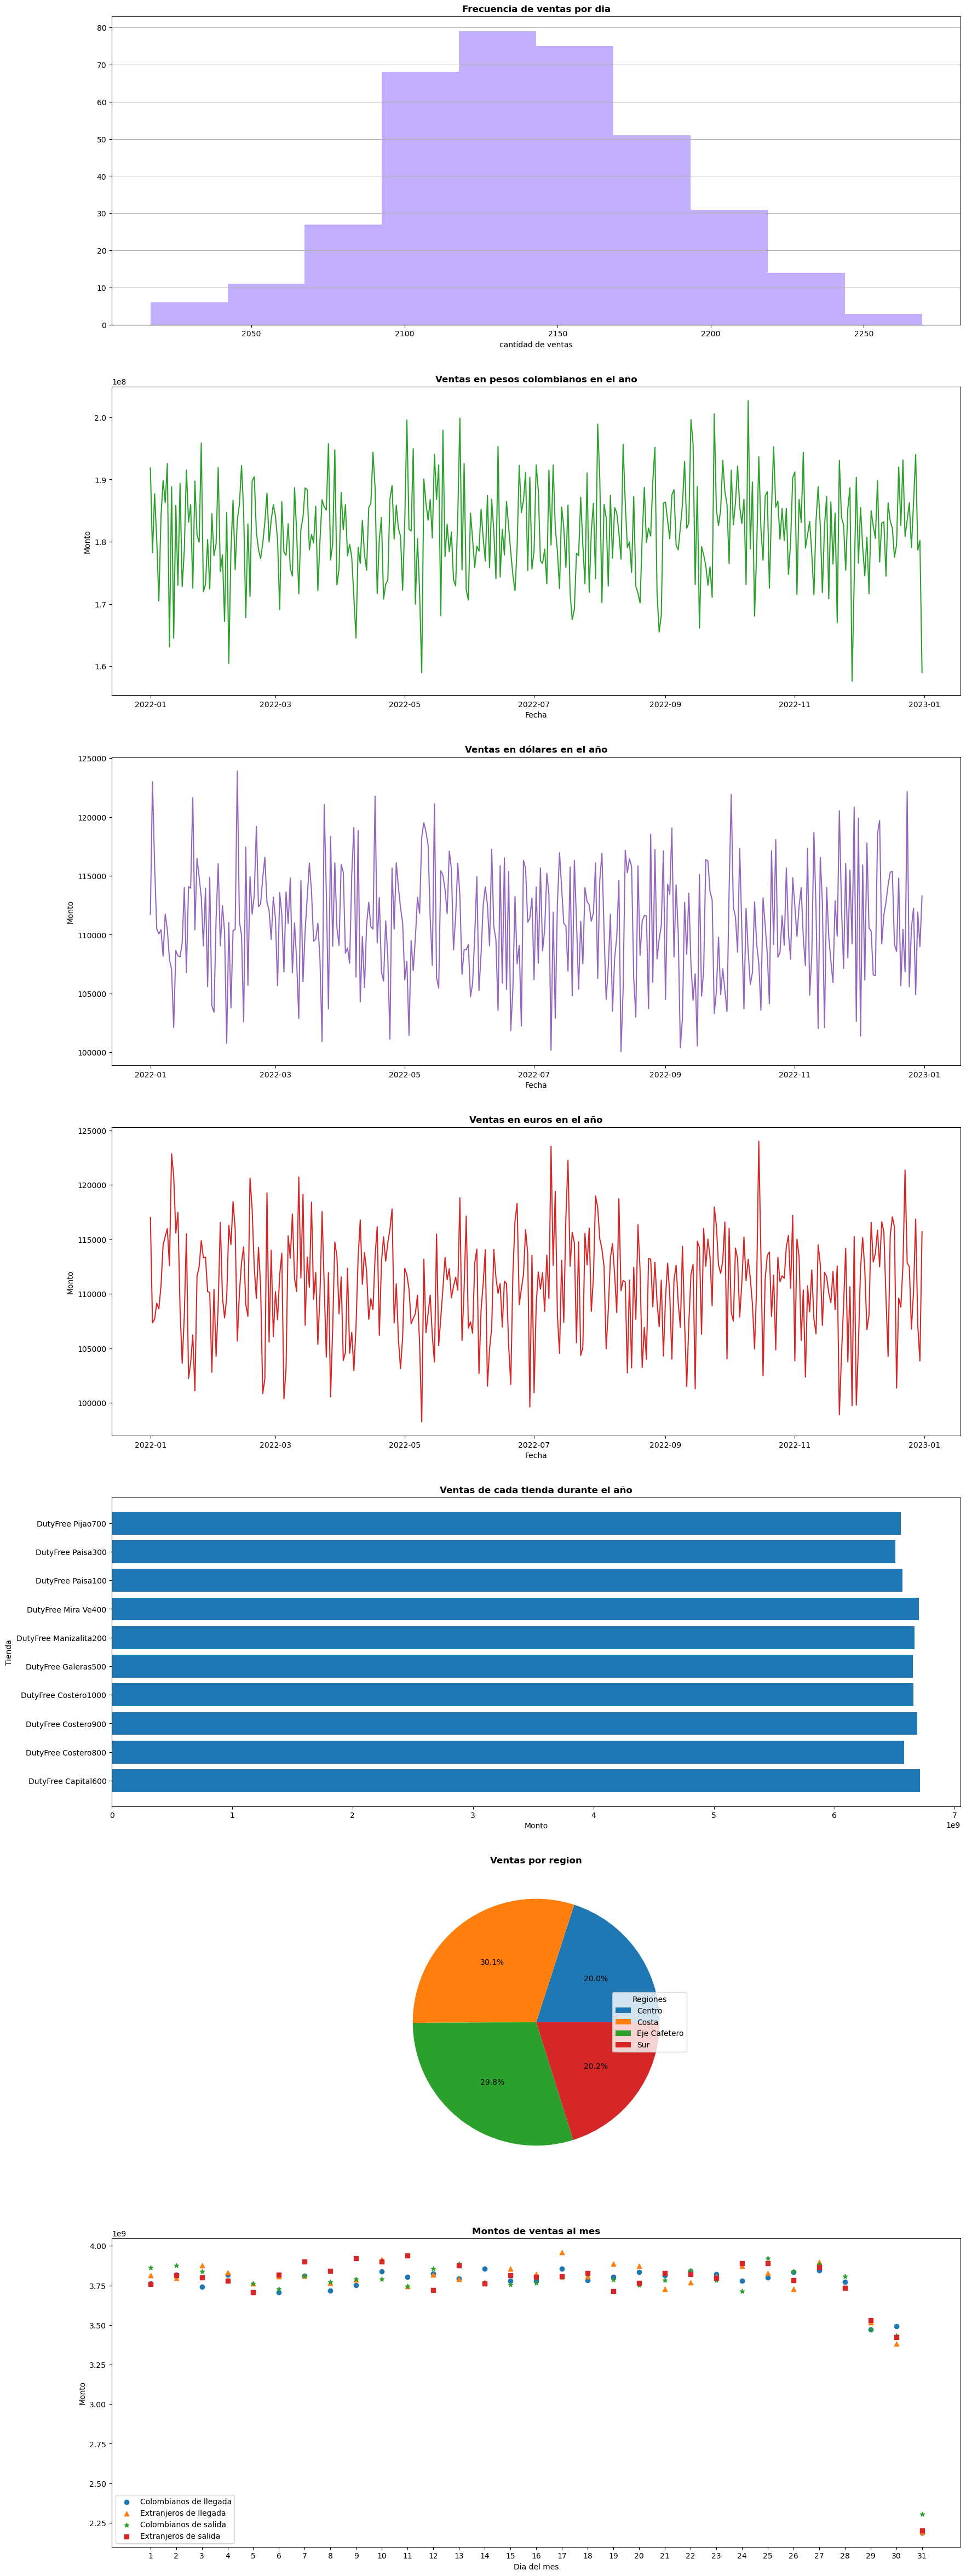

In [18]:
#Un histograma de frecuencias de la cantidad de ventas por día.
df_ventas = df[['fecha', 'id_compra']].groupby(['fecha'], as_index=False).agg(
    ventas=pd.NamedAgg(column="id_compra", aggfunc="count")
)

fig = plt.figure(figsize=(20,60))
fig.tight_layout()

sp_primer_punto = plt.subplot(711)
sp_primer_punto.set_title('Frecuencia de ventas por dia', loc = "center", fontdict = {'fontsize':12, 'fontweight':'bold'})
sp_primer_punto.set_xlabel('cantidad de ventas')
plt.grid(axis = 'y')
plt.hist(df_ventas['ventas'], color='#C1AEFC') 

#-----------------------------------------------------------------------------------------------
#Un gráfico lineal con el monto de ventas diarias para cada divisa

ventas_cop = df.loc[df['moneda'] == 'COP']
monto_ventas_cop = ventas_cop[['fecha', 'monto']].groupby(['fecha'], as_index=False).agg(
    ventas=pd.NamedAgg(column="monto", aggfunc="sum")
)

ventas_usd = df.loc[df['moneda'] == 'USD']
monto_ventas_usd = ventas_usd[['fecha', 'monto']].groupby(['fecha'], as_index=False).agg(
    ventas=pd.NamedAgg(column="monto", aggfunc="sum")
)

ventas_eur = df.loc[df['moneda'] == 'EUR']
monto_ventas_eur = ventas_eur[['fecha', 'monto']].groupby(['fecha'], as_index=False).agg(
    ventas=pd.NamedAgg(column="monto", aggfunc="sum")
)

sp_segundo_punto_cop = plt.subplot(712)
sp_segundo_punto_cop.set_title('Ventas en pesos colombianos en el año', loc = "center", fontdict = {'fontsize':12, 'fontweight':'bold'})
sp_segundo_punto_cop.set_xlabel('Fecha')
sp_segundo_punto_cop.set_ylabel('Monto')
plt.plot(monto_ventas_cop['fecha'], monto_ventas_cop['ventas'], color = 'tab:green', label = 'COP')

sp_segundo_punto_usd = plt.subplot(713)
sp_segundo_punto_usd.set_title('Ventas en dólares en el año', loc = "center", fontdict = {'fontsize':12, 'fontweight':'bold'})
sp_segundo_punto_usd.set_xlabel('Fecha')
sp_segundo_punto_usd.set_ylabel('Monto')
plt.plot(monto_ventas_usd['fecha'], monto_ventas_usd['ventas'], color = 'tab:purple', label = 'USD')

sp_segundo_punto_eur = plt.subplot(714)
sp_segundo_punto_eur.set_title('Ventas en euros en el año', loc = "center", fontdict = {'fontsize':12, 'fontweight':'bold'})
sp_segundo_punto_eur.set_xlabel('Fecha')
sp_segundo_punto_eur.set_ylabel('Monto')
plt.plot(monto_ventas_eur['fecha'], monto_ventas_eur['ventas'], color = 'tab:red', label = 'EUR')


#---------------------------------------------------------------------------------------------------------
#Un gráfico de barras del total del monto de ventas (en Pesos Colombianos) por cada tienda durante el año.
total_ventas_tiendas_cop = ventas_cop[['nombre_tienda', 'id_tienda', 'monto_pagado_cop']].groupby(['nombre_tienda', 'id_tienda'], as_index=False).agg(
    ventas=pd.NamedAgg(column="monto_pagado_cop", aggfunc="sum")
)
total_ventas_tiendas_cop['tienda'] = total_ventas_tiendas_cop.apply(lambda x: x['nombre_tienda'] + str(x['id_tienda']), axis=1)

sp_tercer_punto = plt.subplot(715)
sp_tercer_punto.set_title('Ventas de cada tienda durante el año', loc = "center", fontdict = {'fontsize':12, 'fontweight':'bold'})
sp_tercer_punto.set_xlabel('Monto')
sp_tercer_punto.set_ylabel('Tienda')
plt.barh(total_ventas_tiendas_cop['tienda'], total_ventas_tiendas_cop['ventas'])


#-------------------------------------------------------------------------------------------------
#Un gráfico circular del monto total de ventas (en Pesos Colombianos) por zonas
total_ventas_zonas_cop = ventas_cop[['region', 'monto_pagado_cop']].groupby(['region'], as_index=False).agg(
    ventas=pd.NamedAgg(column="monto_pagado_cop", aggfunc="sum")
)

sp_cuarto_punto = plt.subplot(716)
sp_cuarto_punto.set_title('Ventas por region', loc = "center", fontdict = {'fontsize':12, 'fontweight':'bold'})
plt.pie(total_ventas_zonas_cop['ventas'], autopct='%1.1f%%')
sp_cuarto_punto.legend(
    total_ventas_zonas_cop['region'],
    title ="Regiones",
    loc ="center right")

#------------------------------------------------------------------------------------------------
#Un gráfico de dispersión del monto de ventas (en Pesos Colombianos) vs El día del mes (1 al 31). 
#Utilice distintos marcadores y colores para indicar el tipo de tránsito y la nacionalidad del 
#comprador.

#Se saca el dia del mes de cada venta en una columna nueva
monto_ventas_dias_del_mes = df.copy()
monto_ventas_dias_del_mes['dia_de_mes'] = monto_ventas_dias_del_mes['fecha'].dt.day

# Se hace una agrupación por cada categoría y se suman los montos de acuerdo al dia del mes
ventas_llegadas_colombianos = monto_ventas_dias_del_mes.loc[(df['tipo_transito'] == 'Llegada') &  (df['nacionalidad'] == 'Colombiana')]
suma_ventasllc = ventas_llegadas_colombianos[['dia_de_mes', 'monto_pagado_cop']].groupby(['dia_de_mes'], as_index=False).agg(
    monto_pagado_cop=pd.NamedAgg(column="monto_pagado_cop", aggfunc="sum")
)

ventas_llegadas_extranjeras = monto_ventas_dias_del_mes.loc[(df['tipo_transito'] == 'Llegada') &  (df['nacionalidad'] == 'Extranjera')]
suma_ventaslle = ventas_llegadas_extranjeras[['dia_de_mes', 'monto_pagado_cop']].groupby(['dia_de_mes'], as_index=False).agg(
    monto_pagado_cop=pd.NamedAgg(column="monto_pagado_cop", aggfunc="sum")
)

ventas_salidas_colombianos = monto_ventas_dias_del_mes.loc[(df['tipo_transito'] == 'Salida') & (df['nacionalidad'] == 'Colombiana')]
suma_ventassac = ventas_salidas_colombianos[['dia_de_mes', 'monto_pagado_cop']].groupby(['dia_de_mes'], as_index=False).agg(
    monto_pagado_cop=pd.NamedAgg(column="monto_pagado_cop", aggfunc="sum")
)

ventas_salidas_extranjeras = monto_ventas_dias_del_mes.loc[(df['tipo_transito'] == 'Salida') & (df['nacionalidad'] == 'Extranjera')]
suma_ventassae = ventas_salidas_extranjeras[['dia_de_mes', 'monto_pagado_cop']].groupby(['dia_de_mes'], as_index=False).agg(
    monto_pagado_cop=pd.NamedAgg(column="monto_pagado_cop", aggfunc="sum")
)

import numpy as np

sp_quinto_punto = plt.subplot(717)
sp_quinto_punto.set_title('Montos de ventas al mes', loc = "center", fontdict = {'fontsize':12, 'fontweight':'bold'})
sp_quinto_punto.set_ylabel('Monto')
sp_quinto_punto.set_xlabel('Dia del mes')
plt.scatter(suma_ventasllc['dia_de_mes'], suma_ventasllc['monto_pagado_cop'], label = 'Colombianos de llegada')
plt.scatter(suma_ventaslle['dia_de_mes'], suma_ventaslle['monto_pagado_cop'], marker='^', label = 'Extranjeros de llegada')
plt.scatter(suma_ventassac['dia_de_mes'], suma_ventassac['monto_pagado_cop'], marker='*', label = 'Colombianos de salida')
plt.scatter(suma_ventassae['dia_de_mes'], suma_ventassae['monto_pagado_cop'], marker='s', label = 'Extranjeros de salida')
x = np.arange(1, 32)
plt.xticks(x)
plt.legend()

plt.show()

## Visualizaciones adicionales: Mapas

Los datos poseen latitud y longitud de cada una de las sedes de la compañía. Realice un Mapa interactivo donde coloque un marcador en cada una de las sedes y que adicional muestre:

- Nombre de la tienda.
- ID de la tienda.
- Aeropuerto y ciudad.
- Sigla del aeropuerto.
- Región.
- Cantidad de ventas realizadas.
- Suma total de las ventas (En COP).

`TIP`: Puede utilizar (Folium)[https://python-visualization.github.io/folium/quickstart.html] para realizar el mapa.

In [19]:
# Se hace una agrupación de la información requerida para el mapa
df_mapa = df.groupby(['nombre_tienda', 'id_tienda', 'aeropuerto', 'sigla', 'latitud', 'longitud', 'ciudad', 'region'], as_index=False).agg(
    total_ventas=pd.NamedAgg(column="id_compra", aggfunc="count"),
    total_pagado_cop=pd.NamedAgg(column="monto_pagado_cop", aggfunc="sum")
)
df_mapa

,nombre_tienda,id_tienda,aeropuerto,sigla,latitud,longitud,ciudad,region,total_ventas,total_pagado_cop
0,DutyFree Capital,600,El Dorado,BOG,4.70,-74.15,Bogota,Centro,78336,46400109832.06
1,DutyFree Costero,800,Rafael Nunez,CTG,10.45,-75.52,Cartagena,Costa,77974,46198514846.62
2,DutyFree Costero,900,Ernesto Cortissoz,BAQ,10.89,-74.78,Barranquilla,Costa,78789,46486848619.66
3,DutyFree Costero,1000,Simon Bolivar,SMR,11.12,-74.23,Santa Marta,Costa,78507,46608883122.56
4,DutyFree Galeras,500,Antonio Narino,PSO,1.40,-77.29,Pasto,Sur,78188,46293294537.98
5,DutyFree Manizalita,200,La Nubia,MZL,5.03,-75.47,Manizales,Eje Cafetero,78018,46191164689.98
6,DutyFree Mira Ve,400,Alfonso Bonilla Aragon,CLO,3.53,-76.39,Palmira,Sur,78393,46445917191.45
7,DutyFree Paisa,100,Jose Maria Cordoba,MDE,6.17,-75.43,Rionegro,Eje Cafetero,77949,46403667645.65
8,DutyFree Paisa,300,Matecaña,PEI,4.82,-75.74,Pereira,Eje Cafetero,77411,45896044537.33
9,DutyFree Pijao,700,Perales,IBE,4.43,-75.14,Ibague,Centro,78067,46222827985.88


In [20]:
import folium

mapa = folium.Map(location=[4.178462, -73.186905], zoom_start=5)

for i in range(0, 10):
    tienda = df_mapa.iloc[i,:]
    popup = folium.Popup("<b>Tienda: </b>" + tienda.nombre_tienda + "<br>" + 
                         "<b>id: </b>" + str(tienda.id_tienda) + "<br>" + 
                         "<b>Aeropuerto: </b>" + tienda.aeropuerto + ", "+ tienda.ciudad +"<br>" + 
                         "<b>Sigla: </b>" + tienda.sigla + "<br>" + 
                         "<b>Region: </b>" + tienda.region + "<br>" + 
                         "<b>Total de ventas: </b>" + str(tienda.total_ventas) + "<br>" + 
                         "<b>Suma total de ventas: </b>" + str(tienda.total_pagado_cop.round()) + " COP" , min_width=150, max_width=220)
    tooltip=tienda.nombre_tienda + ", " + tienda.aeropuerto
    folium.Marker([tienda.latitud, tienda.longitud], 
                  popup=popup,
                 icon=folium.Icon(color="red", icon="shop", prefix="fa"),
                 tooltip=tooltip).add_to(mapa)
mapa